# 보스턴 집값 예측 - Regression 예측

원문 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

## 0. 모듈 임포트

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 호출 기본 탐색

In [115]:
test_df = pd.read_csv('./data/bostonhousing_test.csv')
train_df = pd.read_csv('./data/bostonhousing_train.csv')

In [116]:
print(test_df.shape)
test_df.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [117]:
print(train_df.shape)
train_df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [120]:
# set index
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)

In [121]:
train_df_index = set(train_df.columns)
len(train_df_index)

80

In [122]:
test_df_index = set(test_df.columns)
len(test_df_index)

79

In [123]:
train_df_index - test_df_index

{'SalePrice'}

#### ▶ test 데이터 셋엔 train 데이터셋을 통해 예측해야하는 saleprice 칼럼이 없다.

- train 데이터셋 : 칼럼 81개
- test 데이터 셋 : 칼럼 80개

--------------------

# 2. Feature Selection - Variables of Corrleation

변수가 81개로 매우 많다 > 변수가 많을 경우 모델의 설명력을 높일 수 있는 요소가 많지만, (불필요한 변수까지 포함한) 지나치게 많은 피처는 차원의 저주에 의해 오히려 설명력을 떨어뜨릴 수 있다.

> 모든 변수를 사용하는 것도 좋지만 그 중 좀더 의미 있는 변수만을 골라내어 모델을 구축하는 것이 모델의 예측 정확도를 높이는 방법이다.

#### 상관계수 분석을 통해 SalePrice와의 상관도가 0.3 이상인 피쳐만 선별하기로 한다.

In [124]:
cormat = train_df.corr()

In [125]:
top_corr_features = cormat[abs(cormat['SalePrice'])>0.3].index
top_corr_features

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

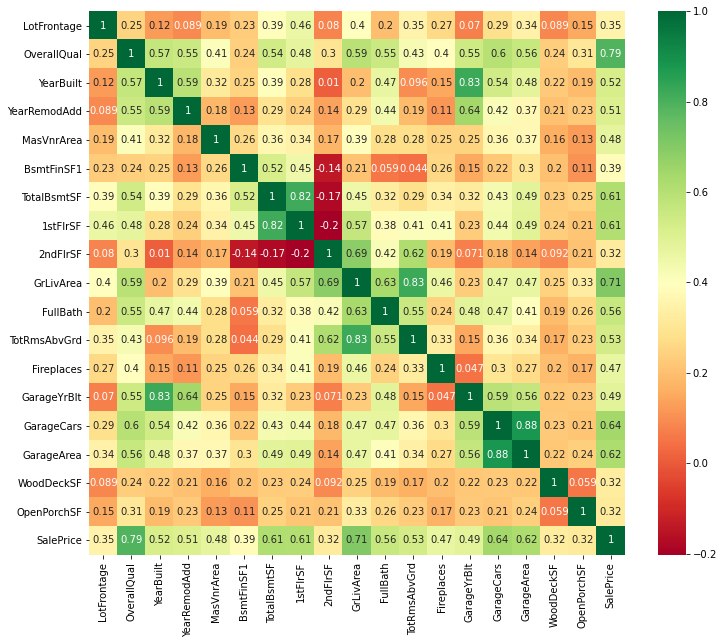

In [126]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [127]:
# feature selection >> 이렇게 피처 설렉션을 하면 히트맵에 나타나는 정수형만 모델에 참여하게 됨

# train_df = train_df[top_corr_features]

# test_df = test_df[top_corr_features.drop(['SalePrice'])]

# train_df.head()

In [128]:
# split y_label

train_y_label = train_df['SalePrice']
train_df.drop(['SalePrice'], axis=1, inplace=True)

train_y_label

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [129]:
print(test_df.shape)
print(train_df.shape)

(1459, 79)
(1460, 79)


----------------------

# 3. Concat train & test set

In [130]:
boston_df = pd.concat((train_df, test_df), axis=0)
boston_df.shape

(2919, 79)

In [131]:
boston_df_index = boston_df.index

In [132]:
print('Lenth of Boston Dataset : ', len(boston_df))
boston_df.head()

Lenth of Boston Dataset :  2919


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [135]:
check_null = boston_df.isna().sum()/len(boston_df)

In [136]:
check_null[check_null >= 0.5]

Alley          0.932169
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

In [137]:
check_null[check_null >= 0.5].keys()

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [138]:
remove_cols = check_null[check_null >= 0.5].keys()
boston_df = boston_df.drop(remove_cols, axis=1)

In [139]:
print(boston_df.shape)
boston_df.head()

(2919, 75)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


-------------------------------

# 5. Check Object & Numeric variables

- 해당 데이터 셋에는 수치형 데이터만 있는 것이 아니다. [성별: 남자, 여자], [학급: 햇님반, 꽃님반, 달님반]과 같은 카테고리형 데이터도 존재한다.
- 이러한 카테고리형 데이터는 각 칼럼을 0과 1로 변환해주는 one-hot encoding을 적용해주어 수치값과 가중치를 달리해주어야 한다.
- 수치형 데이터와 카테고리형 데이터를 구분하기 위해 select_dtypes()를 이용하였다. parameter값으로 include와 exclude를 적용할 수 있는데 이를 통해 데이터를 분리한다.

In [140]:
# split object & numeric

boston_obj_df = boston_df.select_dtypes(include='object') # 카테고리형
boston_num_df = boston_df.select_dtypes(exclude='object') # 수치형

In [149]:
print('Object type columns:{}\n'.format(boston_obj_df.shape) ,boston_obj_df.columns)
print('---------------------------------------------------------------------------------')
print('Numeric type columns:{}\n'.format(boston_num_df.shape),boston_num_df.columns)

Object type columns:(2919, 39)
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
---------------------------------------------------------------------------------
Numeric type columns:(2919, 36)
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       '

----------------

# 6. Change object type to dummy variables

In [151]:
# drop_first=True 의미 !!!

boston_dummy_df = pd.get_dummies(boston_obj_df, drop_first=True)
boston_dummy_df.index = boston_df_index
boston_dummy_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


----------------

# 7. Impute NaN of numeric data to ‘mean’

- 4번쨰 과정에서 null값이 50%이상인 변수들을 제거해주었었는데, 그 이하로 null값이 있는 데이터를 마저 처리해주어야 한다.
- 각 칼럼의 null값을 해당하는 각 변수들의 평균(mean)으로 대체(imputation) 수행
- 평균값 대체를 위하여 scikit-learn의 Imputer 함수를 이용하였으며, strategy 값에 대체해주고자 하는 이름을 넣어주면 해당 값으로 처리한다.

In [158]:
from sklearn.impute import SimpleImputer

# from sklearn.preprocessing import Imputer # 오류 뜸

In [160]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(boston_num_df)
boston_num_df_ = imputer.transform(boston_num_df)

In [162]:
boston_num_df = pd.DataFrame(boston_num_df_, columns=boston_num_df.columns, index=boston_df_index)

----------------

# 8. Merge numeric_df & dummies_df

- 윗 단계에서 obj 형과 num 형으로 각각 구분해서 전처리했던 두 프레임을 합쳐주는 작업 실행
- merge시 index 순서가 꼬이지 않게 left_index=True, right_index=True를 지정하여 merge를 수행

In [165]:
boston_df = pd.merge(boston_dummy_df, boston_num_df, left_index=True, right_index=True)
boston_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,0,0,1,0,1,0,0,1,0,0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,0,0,1,0,1,0,0,0,0,0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,0,0,1,0,1,0,0,0,0,0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,0,0,1,0,1,0,0,0,0,0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


----------------

# 9. Split train & validation & test set

In [169]:
len_train_df = len(train_df)

In [171]:
train_df = boston_df[:len_train_df]
test_df = boston_df[len_train_df:]

train_df['SalePrice'] = train_y_label

print('train set length: ',len(train_df))
print('test set length: ',len(test_df))

train set length:  1460
test set length:  1459


<ipython-input-171-5b940b3cbdc6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['SalePrice'] = train_y_label


In [172]:
from sklearn.model_selection import train_test_split

X_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

X_test = test_df
test_id_idx = test_df.index

In [173]:
print('X_train : ',len(X_train))
print('X_val : ',len(X_val))
print('X_test :',len(X_test))

X_train :  1168
X_val :  292
X_test : 1459


# 10. Training by XGBRegression Model

In [177]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [178]:
model = xgb.XGBRegressor()

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}

grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'colsample_bylevel': 0.7, 'colsample_bytree': 1, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [179]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [180]:
pred_train = grid_search.predict(X_train)
pred_val = grid_search.predict(X_val)

print('train mae score: ', mean_absolute_error(y_train, pred_train))
print('val mae score:', mean_absolute_error(y_val, pred_val))

train mae score:  1084.9154537671234
val mae score: 16892.606913527397


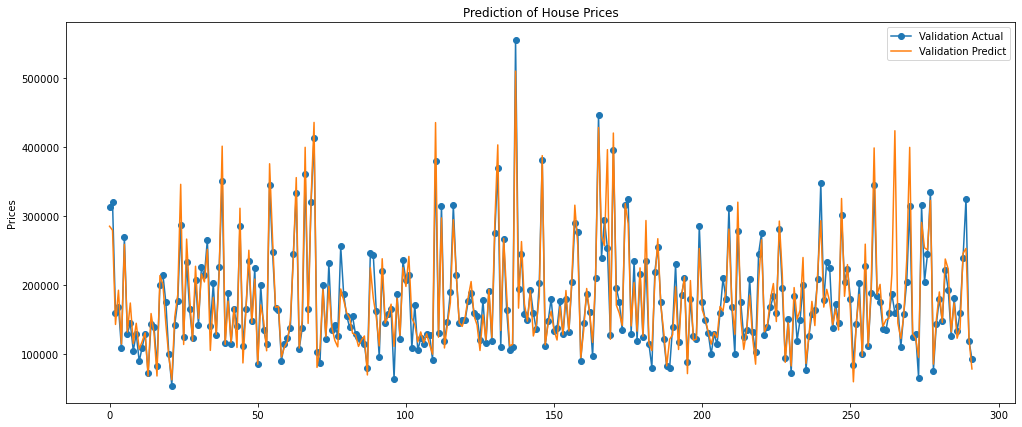

In [181]:
plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_val)), y_val,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '-', label='Validation Predict')
plt.title('Prediction of House Prices')
plt.ylabel('Prices')
plt.legend()

In [ ]:
test_y_pred = grid_search.predict(X_test)

In [ ]:
id_pred_df = pd.DataFrame()
id_pred_df['Id'] = test_id_idx
id_pred_df['SalePrice'] = test_y_pred

In [ ]:
id_pred_df.to_csv('submission.csv', index=False)

# 11. 상관계수 추출을 통한 Feature Selection

# 12. PCA를 통한 Feature Selection